In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [3]:
life_exp = pd.read_csv("LifeExpectancyData.csv")

In [6]:
life_exp.shape

(2938, 22)

In [5]:
life_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
life_exp.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [7]:
life_exp.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [4]:
life_exp.drop(columns=['Country', 'Status'],inplace=True)



In [5]:

life_exp.rename(columns = {" BMI " :"BMI",
  "Life expectancy ": "Life_expectancy",
  "Adult Mortality":"Adult_mortality",
  "infant deaths":"Infant_deaths",
  "percentage expenditure":"Percentage_expenditure",
  "Hepatitis B":"HepatitisB",
  "Measles ":"Measles",
  "under-five deaths ": "Under_five_deaths",
  "Total expenditure":"Total_expenditure",
  "Diphtheria ": "Diphtheria",
  " thinness 1–19 years":"Thinness_1–19_years",
  " thinness 5–9 years":"Thinness_5–9_years",
  " HIV/AIDS":"HIV/AIDS",
  "Income composition of resources":
  "Income_composition_of_resources"}, inplace = True)

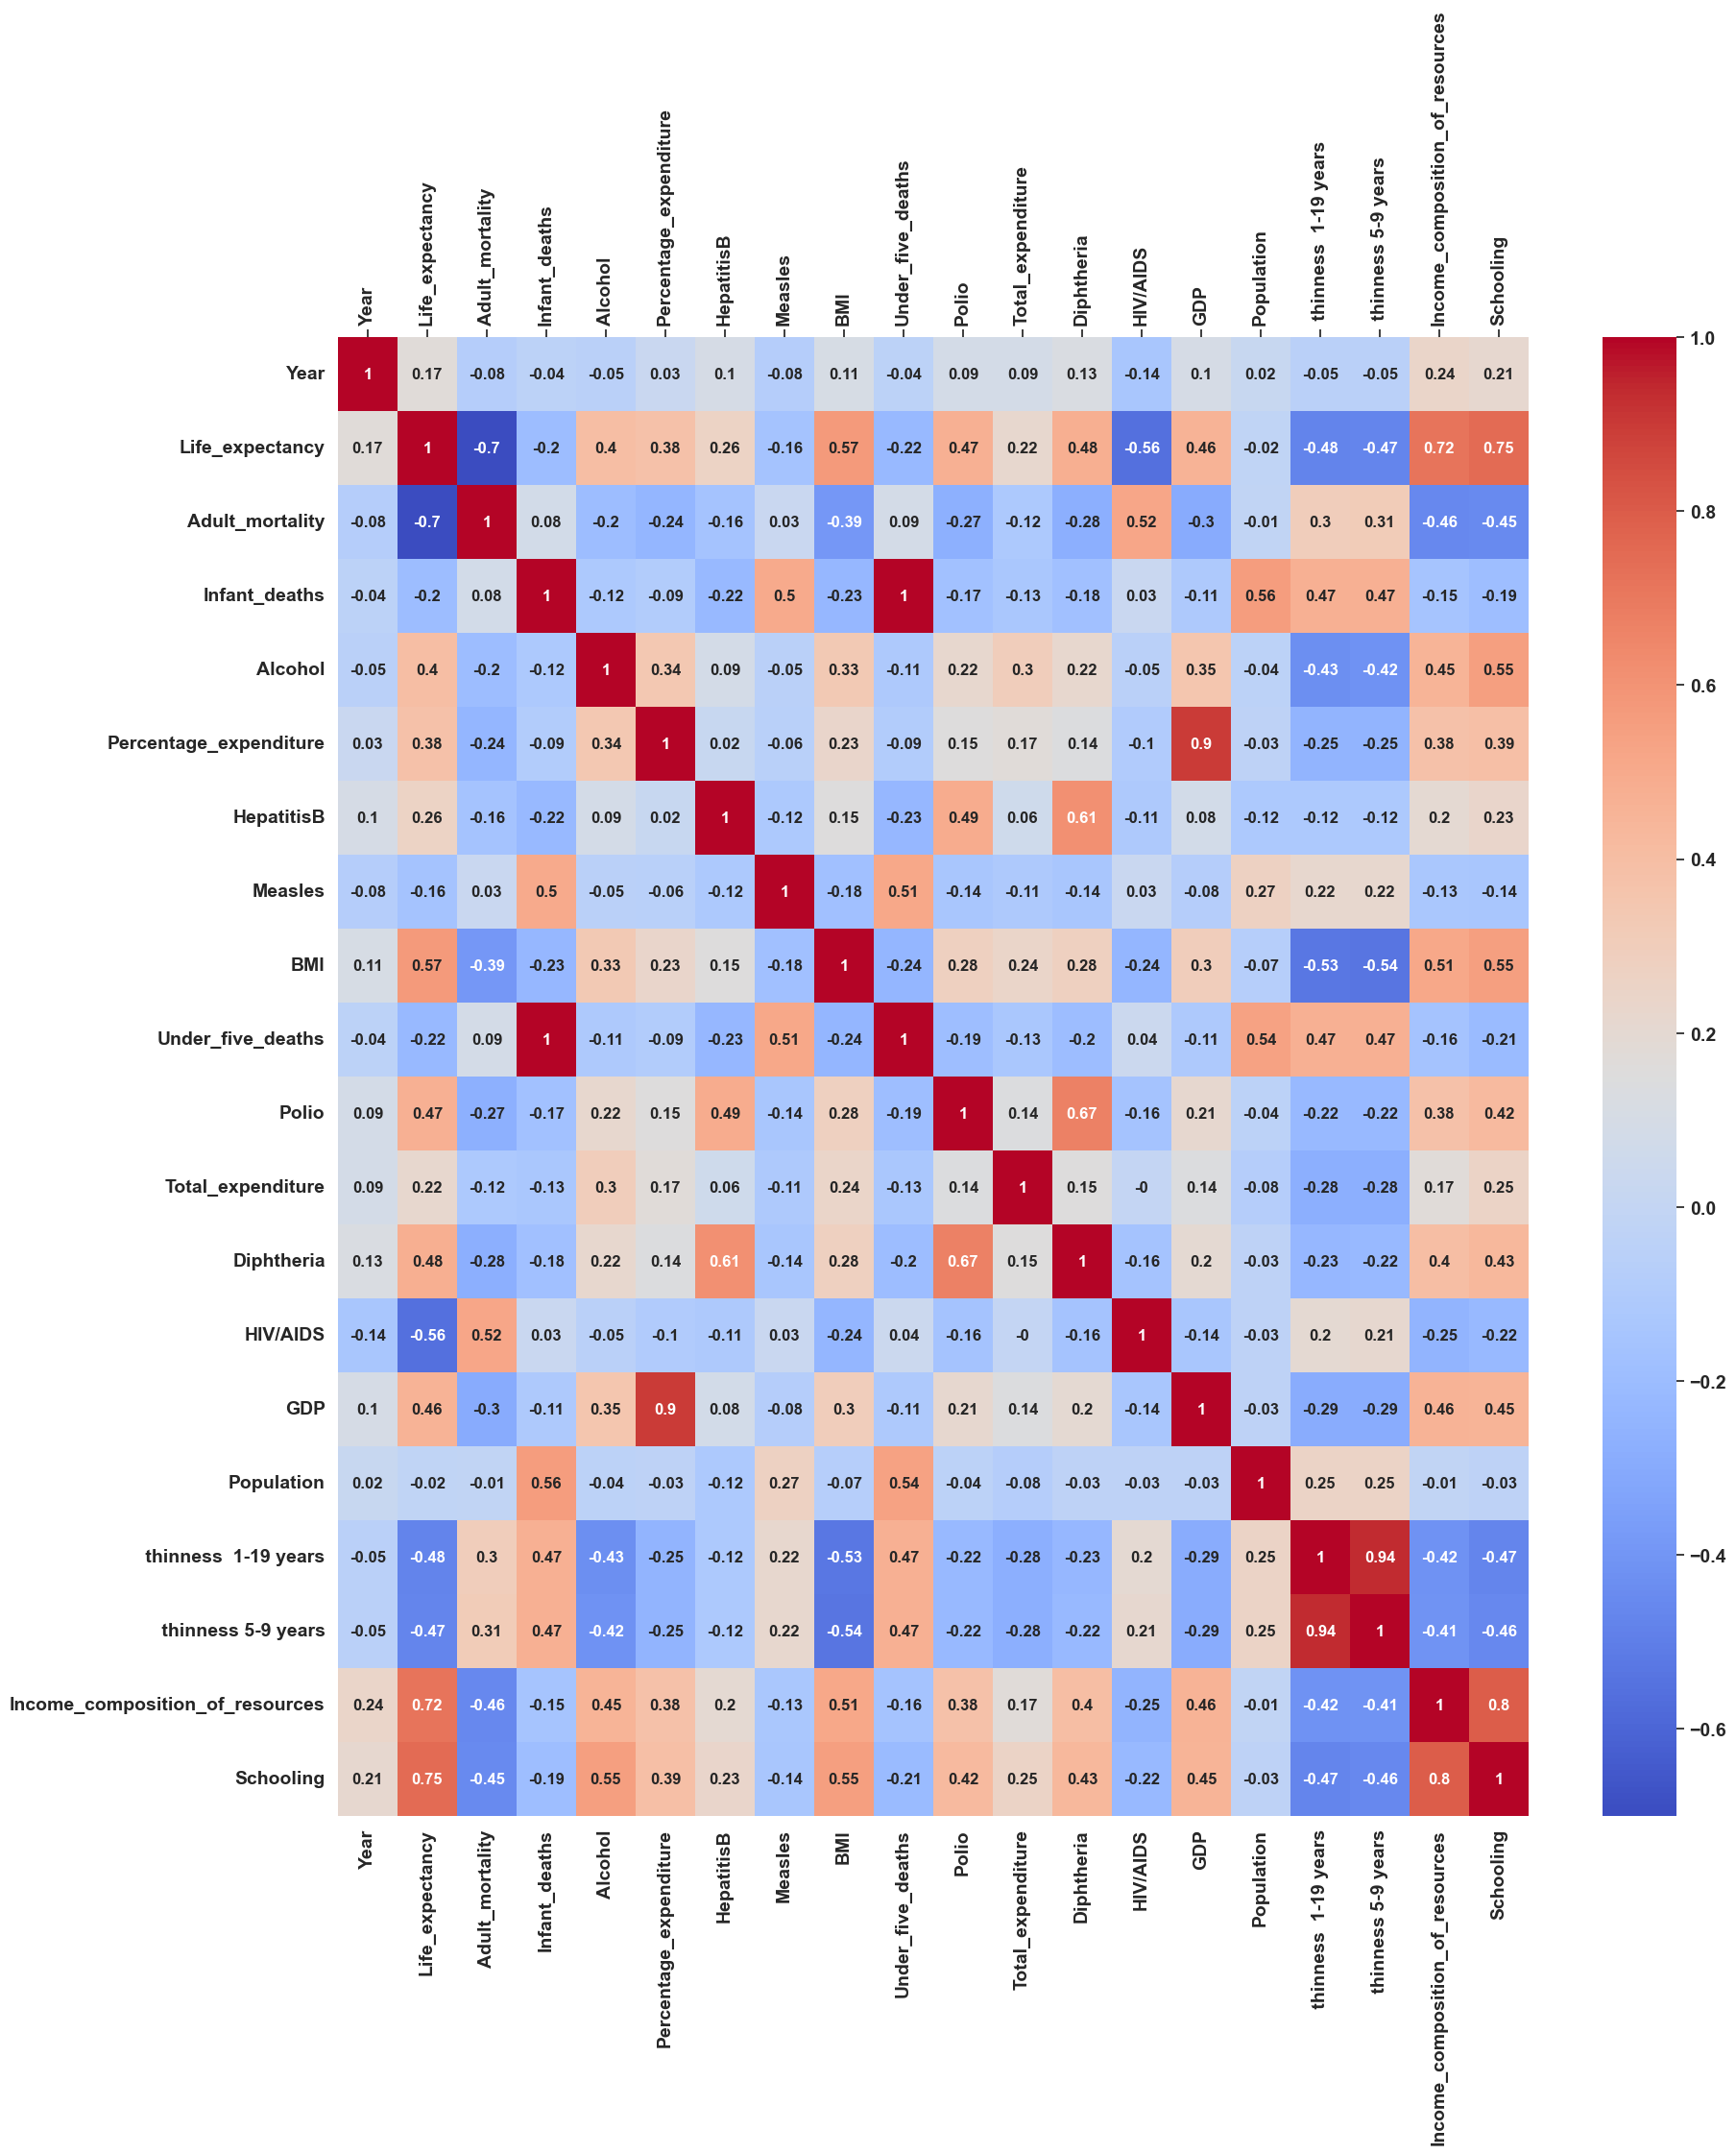

In [6]:
sns.set(rc={
    
    'figure.figsize' : (20,20),
    'font.weight': 'bold',
    'font.size': 12,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'xtick.top' : True,
    'xtick.labeltop': True
    
    
    
})
ax = sns.heatmap(life_exp.corr().round(2),
                 annot=True,
                 cmap="coolwarm")


In [7]:
X = life_exp
Y = life_exp['Life_expectancy']


In [39]:
X.isnull().sum()

Year                               0
Life_expectancy                    0
Adult_mortality                    0
Infant_deaths                      0
Alcohol                            0
Percentage_expenditure             0
HepatitisB                         0
Measles                            0
BMI                                0
Under_five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

In [8]:
has_na = X.columns[X.isnull().any()]
h

def handle_na(col):
    return col.fillna(col.median())

X[has_na] = X[has_na].apply(handle_na)

In [21]:
Y[Y.isna()] = Y.median()

C:\Users\Sikos Márk\AppData\Local\Temp\ipykernel_29360\2472611340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[Y.isna()] = Y.median()


In [11]:
tim_data = X['BMI']
tim_data.head()

0    19.1
1    18.6
2    18.1
3    17.6
4    17.2
Name: BMI, dtype: float64

Text(0, 0.5, 'Life Expectancy')

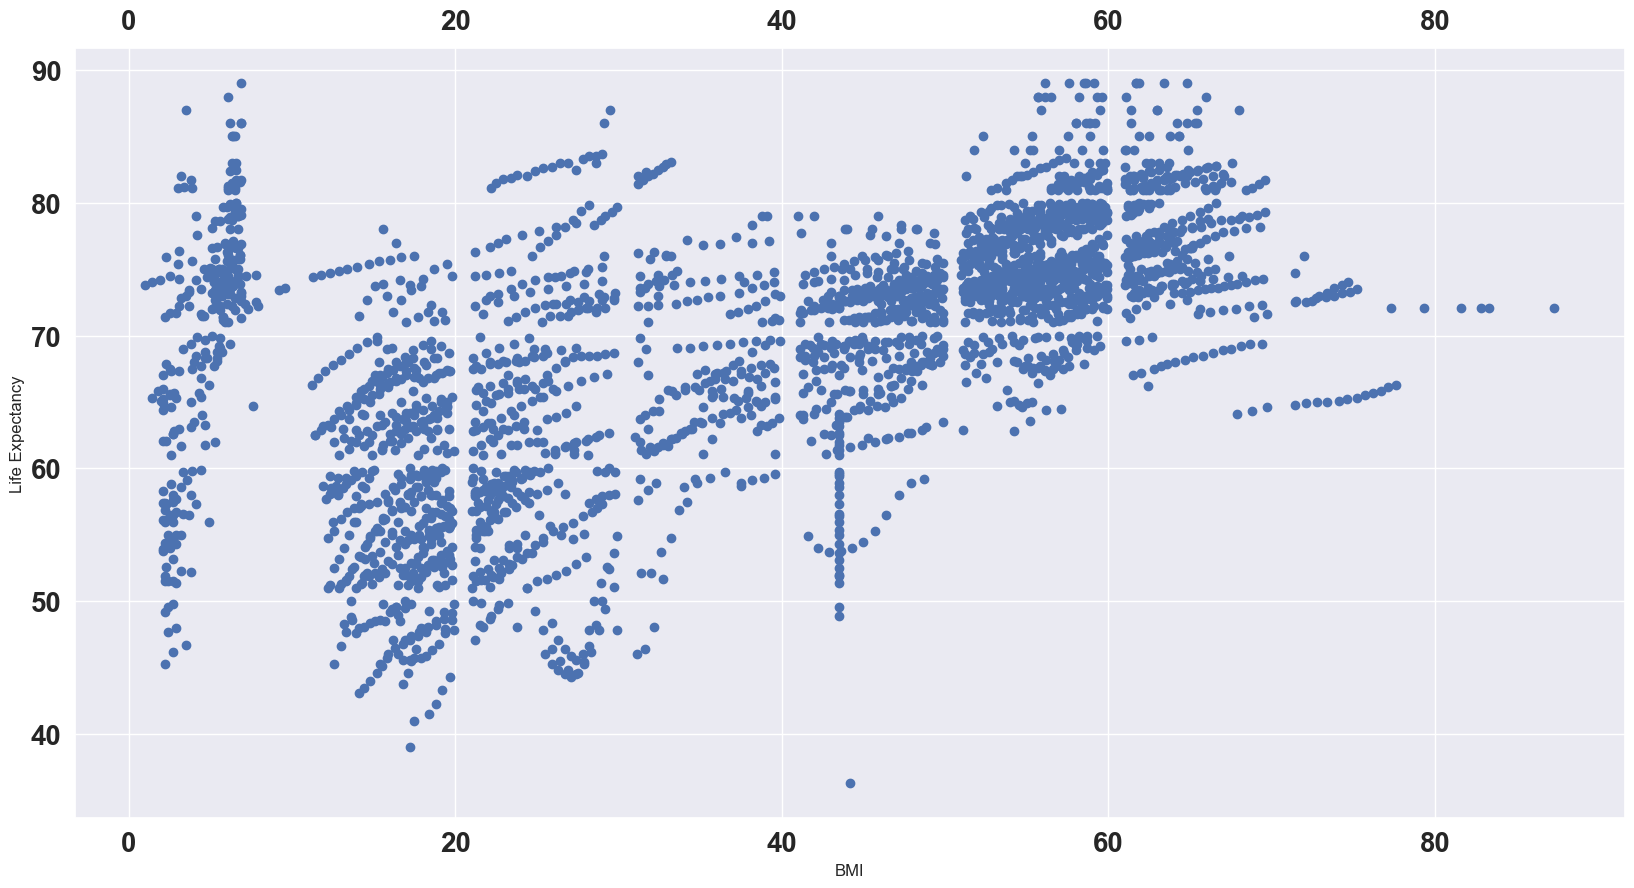

In [9]:
sns.set(rc = {
    'figure.figsize':(20,10),
    'font.weight': 'bold',
    'font.size': 12,
    'xtick.labelsize': 20,
    'ytick.labelsize':20
})


plt.scatter(x =X['BMI'], y =X['Life_expectancy'])
plt.xlabel('BMI')
plt.ylabel("Life Expectancy")

In [62]:
tim_data

0       19.1
1       18.6
2       18.1
3       17.6
4       17.2
        ... 
2933    27.1
2934    26.7
2935    26.3
2936    25.9
2937    25.5
Name: BMI, Length: 2938, dtype: float64

In [12]:
def preprocess(X):
    return np.stack((np.ones(X.shape),X)).T

tim_data_ready = preprocess(tim_data.to_numpy())
print(np.stack(np.ones(tim_data.shape)).shape)

(2938,)


In [64]:
tim_data_ready

array([[ 1. , 19.1],
       [ 1. , 18.6],
       [ 1. , 18.1],
       ...,
       [ 1. , 26.3],
       [ 1. , 25.9],
       [ 1. , 25.5]])

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

tim_theta = model.fit(X,Y)

print(tim_theta)

LinearRegression()


In [34]:

data =list(zip(tim_theta.feature_names_in_,tim_theta.coef_))

import pandas as pd
from tabulate import tabulate

df = pd.DataFrame(data, columns=['Feature Name', 'Coefficient'])

print(tabulate(df, headers='keys', tablefmt='psql'))

+----+---------------------------------+---------------+
|    | Feature Name                    |   Coefficient |
|----+---------------------------------+---------------|
|  0 | Year                            |   4.29139e-11 |
|  1 | Life_expectancy                 |   1           |
|  2 | Adult_mortality                 |  -6.21067e-12 |
|  3 | Infant_deaths                   |  -1.56627e-10 |
|  4 | Alcohol                         |  -5.51288e-11 |
|  5 | Percentage_expenditure          |  -5.26835e-14 |
|  6 | HepatitisB                      |   3.29928e-11 |
|  7 | Measles                         |   5.49011e-14 |
|  8 | BMI                             |  -1.35503e-11 |
|  9 | Under_five_deaths               |   4.50329e-11 |
| 10 | Polio                           |  -1.11558e-11 |
| 11 | Total_expenditure               |   9.47348e-11 |
| 12 | Diphtheria                      |  -1.14021e-11 |
| 13 | HIV/AIDS                        |  -9.48894e-12 |
| 14 | GDP                     

In [36]:
height = 1.82 #float(input("Please input your height (in meters): ")) #1.82
weight = 80 #float(input("Please input your weight (in kilograms): ")) #80
bmi = weight / height**2
tim_theta.predict(bmi)

C:\Users\Sikos Márk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got scalar array instead:
array=24.151672503320853.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.